In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [3]:
df=pd.read_csv("E:/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
len(df)

891

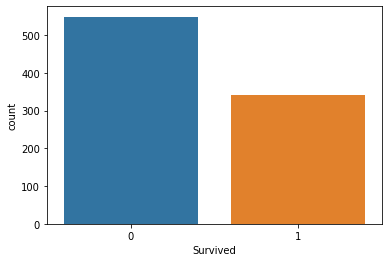

In [9]:
sns.countplot(df['Survived'])

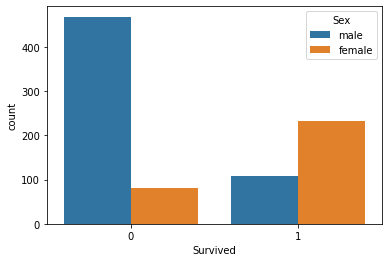

In [11]:
sns.countplot(x="Survived",hue="Sex",data=df)

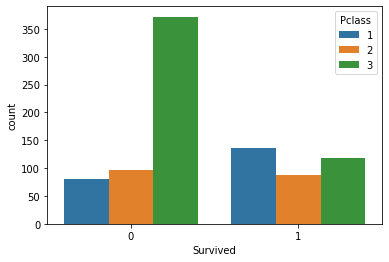

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=df)

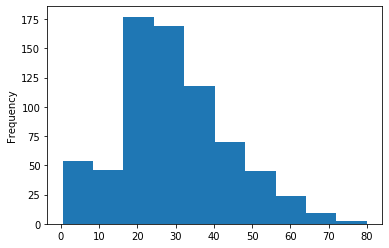

In [13]:
df['Age'].plot.hist()

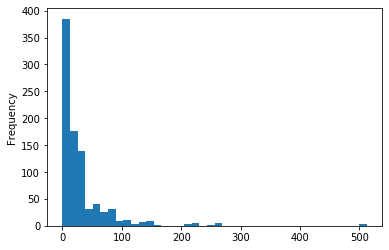

In [14]:
df['Fare'].plot.hist(bins=40)

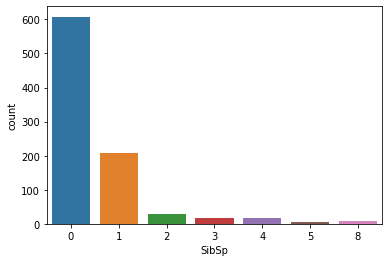

In [15]:
sns.countplot(df['SibSp'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [17]:
##DATA WRANGLING

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

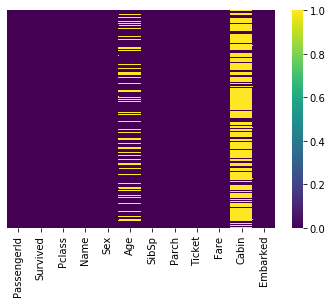

In [21]:
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

In [22]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
df['Age']=df[['Age','Pclass']].apply(input_age,axis=1)

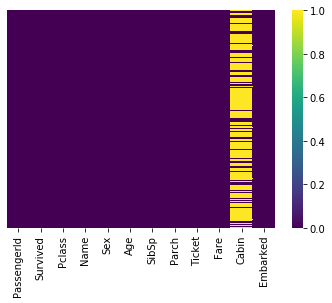

In [24]:
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

In [25]:
df.drop('Cabin',axis=1,inplace=True)


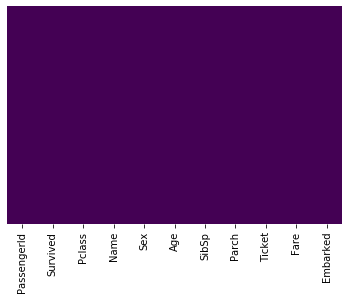

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [27]:
sex=pd.get_dummies(df['Sex'],drop_first=True)


In [28]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)


In [35]:
df.drop(['Sex','Embarked','Name','Ticket','PassengerId','Pclass'],axis=1,inplace=True)


In [33]:
df=pd.concat([df,sex,embark],axis=1)


In [36]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,1,0,1


In [40]:
from sklearn.model_selection import train_test_split


In [38]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)


In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predcitions=logmodel.predict(x_test)


In [50]:
from sklearn.metrics import classification_report

In [51]:
classification_report(y_test,predcitions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.86      0.81       154\n           1       0.77      0.65      0.70       114\n\n    accuracy                           0.77       268\n   macro avg       0.77      0.75      0.76       268\nweighted avg       0.77      0.77      0.77       268\n'

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,predcitions)

array([[132,  22],
       [ 40,  74]], dtype=int64)

In [54]:
    from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,predcitions)

0.7686567164179104